# Plotting time-series

Time series data is data that is recorded. Visualizing this type of data helps clarify trends and illuminates relationships between data.

# 1. Plotting time-series

<b>1.1 Read data with a time index</b>

pandas DataFrame objects can have an index that denotes time. This is useful because Matplotlib recognizes that these measurements represent time and labels the values on the axis accordingly.

In this exercise, you will read data from a CSV file called climate_change.csv that contains measurements of CO2 levels and temperatures made on the 6th of every month from 1958 until 2016. You will use pandas' read_csv function.

To designate the index as a DateTimeIndex, you will use the parse_dates and index_col key-word arguments both to parse this column as a variable that contains dates and also to designate it as the index for this DataFrame.

In [26]:
# Import pandas as pd
import pandas as pd

# Read the data from file using read_csv
climate_change = pd.read_csv('C:\\Users\\yazan\\Desktop\\DS\\5-Introduction to Data Visualization with Matplotlib\\Datasets\\climate_change.csv', parse_dates=["date"], index_col="date")
print(climate_change.head())

               co2  relative_temp
date                             
1958-03-06  315.71           0.10
1958-04-06  317.45           0.01
1958-05-06  317.50           0.08
1958-06-06     NaN          -0.05
1958-07-06  315.86           0.06


<b>1.2 Plot time-series data</b>

To plot time-series data, we use the Axes object plot command. The first argument to this method are the values for the x-axis and the second argument are the values for the y-axis.

This exercise provides data stored in a DataFrame called climate_change. This variable has a time-index with the dates of measurements and two data columns: "co2" and "relative_temp".

In this case, the index of the DataFrame would be used as the x-axis values and we will plot the values stored in the "relative_temp" column as the y-axis values. We will also properly label the x-axis and y-axis.

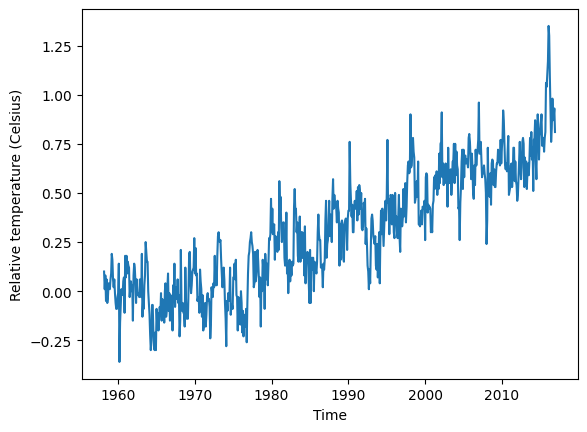

In [27]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

# Add the time-series for "relative_temp" to the plot
ax.plot(climate_change.index, climate_change['relative_temp'])

# Set the x-axis label
ax.set_xlabel('Time')

# Set the y-axis label
ax.set_ylabel('Relative temperature (Celsius)')

# Show the figure
plt.show()

<b>1.3 Using a time index to zoom in</b>

When a time-series is represented with a time index, we can use this index for the x-axis when plotting. We can also select a range of dates to zoom in on a particular period within the time-series using pandas' indexing facilities. In this exercise, you will select a portion of a time-series dataset and you will plot that period.

The data to use is stored in a DataFrame called climate_change, which has a time-index with dates of measurements and two data columns: "co2" and "relative_temp".

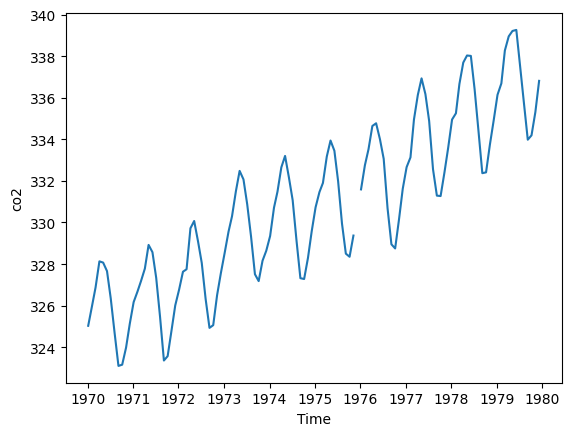

In [28]:
# Use plt.subplots to create fig and ax
fig, ax = plt.subplots()

# Create variable seventies with data from "1970-01-01" to "1979-12-31"
seventies = climate_change["1970-01-01":"1979-12-31"]

# Add the time-series for "co2" data from seventies to the plot
ax.plot(seventies.index, seventies["co2"])

# Set the x-axis label
ax.set_xlabel('Time')

# Set the y-axis label
ax.set_ylabel('co2')

# Show the figure
plt.show()


# 2. Plotting time-series with different variables

<b>2.1 Plotting two variables</b>

If you want to plot two time-series variables that were recorded at the same times, you can add both of them to the same subplot.

If the variables have very different scales, you'll want to make sure that you plot them in different twin Axes objects. These objects can share one axis (for example, the time, or x-axis) while not sharing the other (the y-axis).

To create a twin Axes object that shares the x-axis, we use the twinx method.

In this exercise, you'll have access to a DataFrame that has the climate_change data loaded into it. This DataFrame was loaded with the "date" column set as a DateTimeIndex, and it has a column called "co2" with carbon dioxide measurements and a column called "relative_temp" with temperature measurements.

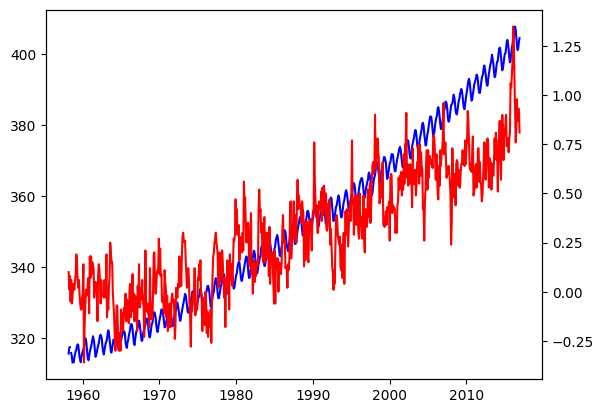

In [29]:
# Initalize a Figure and Axes
fig, ax = plt.subplots()

# Plot the CO2 variable in blue
ax.plot(climate_change.index, climate_change['co2'], color='b')

# Create a twin Axes that shares the x-axis
ax2 = ax.twinx()

# Plot the relative temperature in red
ax2.plot(climate_change.index, climate_change['relative_temp'], color='r')

plt.show()

<b> 2.2 Defining a function that plots time-series data</b>

Once you realize that a particular section of code that you have written is useful, it is a good idea to define a function that saves that section of code for you, rather than copying it to other parts of your program where you would like to use this code.

Here, we will define a function that takes inputs such as a time variable and some other variable and plots them as x and y inputs. Then, it sets the labels on the x- and y-axis and sets the colors of the y-axis label, the y-axis ticks and the tick labels.

In [30]:
# Define a function called plot_timeseries
def plot_timeseries(axes, x, y, color, xlabel, ylabel):

  # Plot the inputs x,y in the provided color
  axes.plot(x, y, color= color)

  # Set the x-axis label
  axes.set_xlabel(xlabel)

  # Set the y-axis label
  axes.set_ylabel(ylabel, color= color)

  # Set the colors tick params for y-axis
  axes.tick_params('y', colors= color)

<b>2.3 Using a plotting function</b>

Defining functions allows us to reuse the same code without having to repeat all of it. Programmers sometimes say "Don't repeat yourself".

In the previous exercise, you defined a function called plot_timeseries:

```python:
plot_timeseries(axes, x, y, color, xlabel, ylabel)
```
that takes an Axes object (as the argument axes), time-series data (as x and y arguments) the name of a color (as a string, provided as the color argument) and x-axis and y-axis labels (as xlabel and ylabel arguments). In this exercise, the function plot_timeseries is already defined and provided to you.

Use this function to plot the climate_change time-series data, provided as a pandas DataFrame object that has a DateTimeIndex with the dates of the measurements and co2 and relative_temp columns.

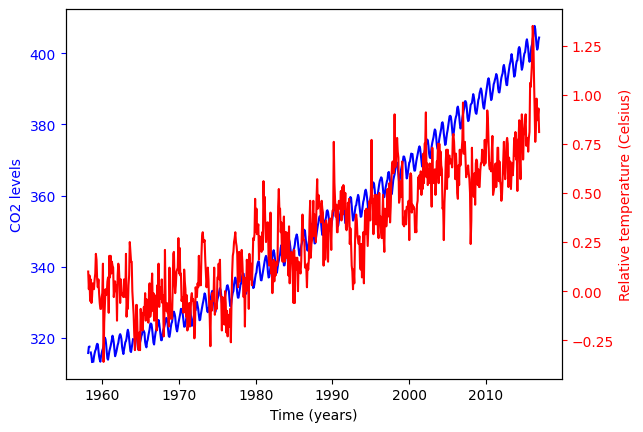

In [31]:
fig, ax = plt.subplots()

# Plot the CO2 levels time-series in blue
plot_timeseries(ax, climate_change.index, climate_change['co2'], "blue", 'Time (years)', "CO2 levels")

# Create a twin Axes object that shares the x-axis
ax2 = ax.twinx()

# Plot the relative temperature data in red
plot_timeseries(ax2, climate_change.index, climate_change['relative_temp'], "red", 'Time (years)', "Relative temperature (Celsius)")

plt.show()

# 3. Annotating time-series data

<b>3.1 Annotating a plot of time-series data</b>

Annotating a plot allows us to highlight interesting information in the plot. For example, in describing the climate change dataset, we might want to point to the date at which the relative temperature first exceeded 1 degree Celsius.

For this, we will use the annotate method of the Axes object. In this exercise, you will have the DataFrame called climate_change loaded into memory. Using the Axes methods, plot only the relative temperature column as a function of dates, and annotate the data.

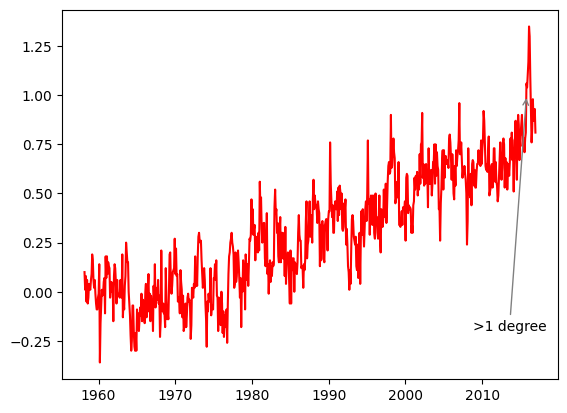

In [33]:
fig, ax = plt.subplots()

# Plot the relative temperature data
ax.plot(climate_change.index, climate_change['relative_temp'], color= 'r')

# Annotate the date at which temperatures exceeded 1 degree
ax.annotate(">1 degree", 
xy=(pd.Timestamp('2015-10-06'), 1),
xytext=(pd.Timestamp('2008-10-06'), -0.2),
arrowprops={"arrowstyle":"->", "color":"gray"})

plt.show()

<b>3.2 Plotting time-series: putting it all together</b>

In this exercise, you will plot two time-series with different scales on the same Axes, and annotate the data from one of these series.

The CO2/temperatures data is provided as a DataFrame called climate_change. You should also use the function that we have defined before, called plot_timeseries, which takes an Axes object (as the axes argument) plots a time-series (provided as x and y arguments), sets the labels for the x-axis and y-axis and sets the color for the data, and for the y tick/axis labels:

plot_timeseries(axes, x, y, color, xlabel, ylabel)

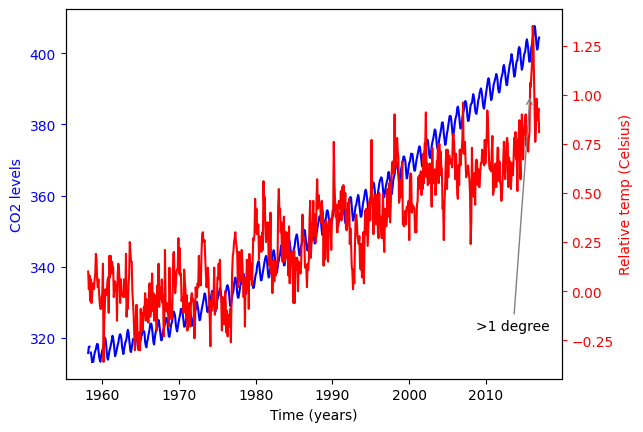

In [34]:
fig, ax = plt.subplots()

# Plot the CO2 levels time-series in blue
plot_timeseries(ax, climate_change.index, climate_change['co2'], "blue", 'Time (years)', "CO2 levels")

# Create an Axes object that shares the x-axis
ax2 = ax.twinx()

# Plot the relative temperature data in red
plot_timeseries(ax2, climate_change.index, climate_change['relative_temp'], "red", 'Time (years)', 'Relative temp (Celsius)')

# Annotate point with relative temperature >1 degree
ax2.annotate(">1 degree", 
xy=(pd.Timestamp('2015-10-06'), 1),
xytext=(pd.Timestamp('2008-10-06'), -0.2),
arrowprops={"arrowstyle":"->", "color":"gray"})

plt.show()